<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Normality Test</strong></h1>



# Importing Necessary Libraries and datasets

In [ ]:
# Install a conda package in the current Jupyter kernel
!{sys.executable} -m pip install statsmodels

# work with df in tabular representation
import pandas as pd
# round the df in the correlation matrix
import numpy as np
import os
from scipy.stats import t

# Modules for df visualization
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from numpy import mean
from numpy import std

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

In [ ]:
# set the general path of the external df
external_df_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dfset from external dfset
df = os.path.join(external_df_path, 'cleaned_data.csv')

In [ ]:
# import dfset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

# select non-numeric columns
df_string = df.select_dtypes(include='string').columns.tolist()


print("Numeric columns: ", df_numeric, "\n")
print("String columns: ", df_string, "\n\n")

# print dfset info
print("The shape and df type of the ORGINAL df:", str(df.info()))

# print first 3 rows
df.head(3)

# DESCRIPTIVE STATISTIC

# DESCRIPTIVE STATISTIC

In [85]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,991.0,77301.827447,94565.819796,88.0,10446.0,33166.0,112518.0,568157.0
age,991.0,33.147326,6.681385,17.0,28.0,32.0,37.0,54.0
height,991.0,8534.258325,266470.674449,39.0,67.0,70.0,72.0,8388607.0
weight,991.0,180.637740,27.973706,88.0,163.5,183.0,199.5,298.0
fran,991.0,276.001009,374.220295,60.0,168.5,217.0,290.0,5940.0
helen,991.0,582.930373,351.778297,60.0,480.0,530.0,602.0,5940.0
grace,991.0,217.392533,375.440786,30.0,121.0,159.0,214.0,5940.0
filthy50,991.0,1458.544904,532.004458,50.0,1165.0,1359.0,1614.0,5940.0
fgonebad,991.0,436.349142,3167.322549,0.0,298.5,338.0,392.0,100000.0
run400,991.0,109.273461,353.075236,4.0,60.0,67.0,77.0,5940.0


In [86]:
# Number of Unique Athlete
print(df.athlete_id.nunique() == df.shape[0])
# Summary Stats: weight
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["weight"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
weight,991.0,180.63774,27.973706,88.0,117.9,133.0,140.0,156.0,183.0,204.0,215.0,220.0,250.0,298.0


# The Central Limit Theorem (CLT)

The problem of small samples is a common one, and was first investigated by William Gosset who is better known by his pseudonym Student. Gosset worked for the Guinness brewing company and was trying to compare strains of barley. In his experiments different fields of barley would each yield one data point. Clearly you don’t want to cultivate 40 fields if ten would do. The tests we will describe in this section assume that the population being sampled is
Normally distributed. If this is assumed then the distribution of sample means, ̄X, will also be normally distributed with the same mean and variance σ2/n. But in practice we do not know σ, we need to estimate it from the sample
data, that is we use s to estimate σ. This works for large enough n, but s is not a good approximation to the unknown σ for small n. Now to do hypothesis tests, and other things concerning the unknown mean of the population, we need to calculate

![The Central Limit Theorem (CLT) formula](../media/images/The_Central_Limit_Theorem.png)
![The Central Limit Theorem (CLT) definition](../media/images/CLT_definition.png)


Data is whether to use parametric or nonparametric statistical methods.
RULE OF THUMB
If n > 30, the Central Limit Theorem can be used.
Of course, exceptions exist, but this rule applies to most distributions of real data.

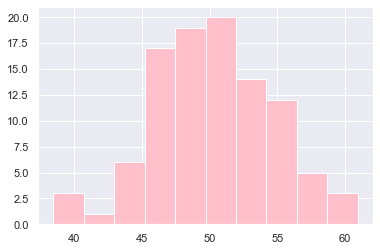

In [99]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data, color="pink")
pyplot.show()

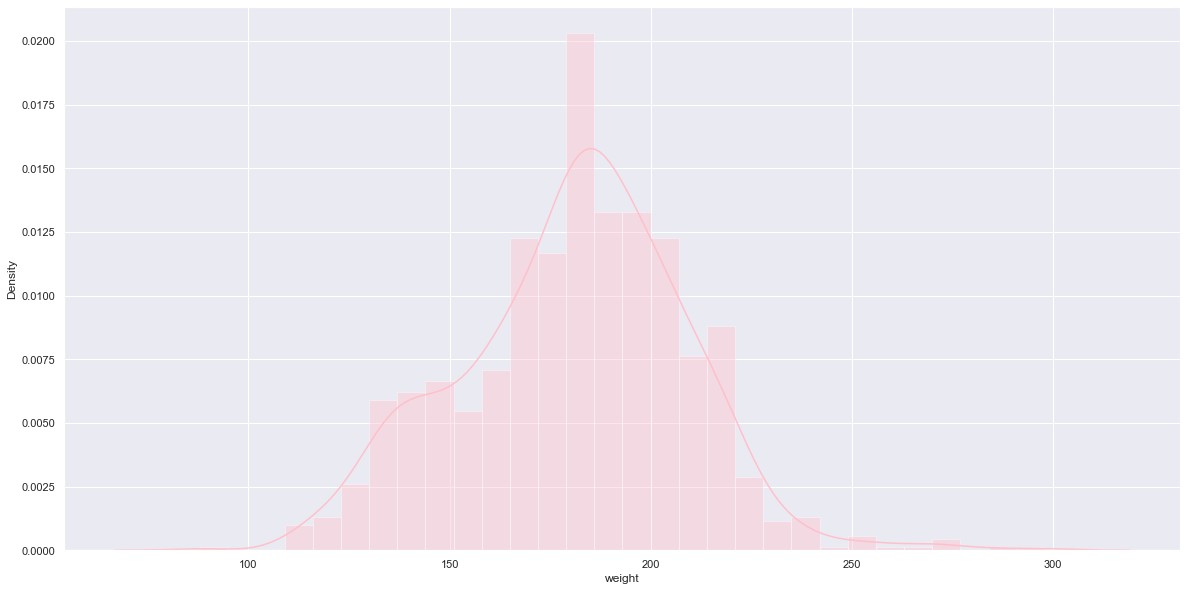

In [88]:
plt.figure(figsize = (20,10))
sns.distplot(df.weight,color = 'pink')
plt.savefig('distplot.png')

In [89]:
#  Groups & Target Summary Stats
df.groupby("gender").weight.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
female,178,140.0,140.533708,13.775090,188
male,813,188.0,189.418204,21.976079,298


<a id="1"></a> <br>
# Histogram
* How many times each value appears in dfset. This description is called the distribution of variable
* Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears

In [90]:
import plotly.express as px

df1 = df[['weight','gender']]
fig = px.histogram(df1, x="gender",y="weight",  histfunc='avg')
fig.show()

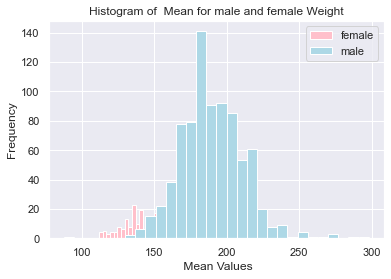

Most frequent female weight mean is:  134.8


In [98]:
female = plt.hist(df[df["gender"] == "female"].weight,bins=30,label = "female", color="pink")
male = plt.hist(df[df["gender"] == "male"].weight,bins=30,label = "male", color="lightblue")
plt.legend()
plt.xlabel(" Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  Mean for male and female Weight")
plt.savefig('female_male_weight_hist.png')
plt.show()
frequent_weight_mean = female[0].max()
index_frequent_weight_mean = list(female[0]).index(frequent_weight_mean)
most_frequent_weight_mean = female[1][index_frequent_weight_mean]
print("Most frequent female weight mean is: ",most_frequent_weight_mean)

# How to Plot a t Distribution with a specific degrees of freedom:

(array([0.73734063, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.47468127,
        0.        , 1.47468127, 0.73734063, 0.73734063, 0.        ,
        0.73734063, 0.        , 0.        , 0.        , 1.47468127]),
 array([-1.60916345, -1.47354092, -1.33791839, -1.20229586, -1.06667334,
        -0.93105081, -0.79542828, -0.65980575, -0.52418323, -0.3885607 ,
        -0.25293817, -0.11731565,  0.01830688,  0.15392941,  0.28955194,
         0.42517446,  0.56079699,  0.69641952,  0.83204204,  0.96766457,
         1.1032871 ]),
 <BarContainer object of 20 artists>)

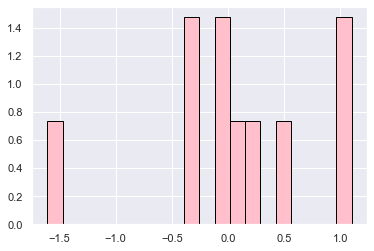

In [92]:
#generate t distribution with sample size 10
x = t.rvs(df=9, size=10)

#create plot of t distribution
plt.hist(x, density=True, edgecolor='black', bins=20, color='pink')

---------
# Randomly select a 10 number of rows from a dataframe


In [93]:
df_sample = df.sample(n=10, random_state=42)
df_sample

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,division,rank,score
213,11444,dan juchniewicz,mid atlantic,crossfit rage,crossfit rage,male,26,69,165,268,473,224,1201,315,54,1160,255,216,407,345,0,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|i p...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,14739,573
331,19144,alexander pogrebinsky,north east,crossfit southie,crossfit southie,male,31,70,189,354,625,209,1504,238,90,1500,235,185,455,315,37,i eat 1-3 full cheat meals per week|,i workout mostly at a crossfit affiliate|i rec...,i have no athletic background besides crossfit|,i began crossfit with a coach (e.g. at an affi...,i usually only do 1 workout a day|i typically ...,male,43445,766
501,144032,sheldon johnson,north west,crossfit intensify,crossfit intensify,male,45,72,205,231,212,229,1996,289,63,1459,195,145,325,275,19,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,decline to answer|,male,43445,766
309,11756,maguid nicholas,canada east,team tidal toronto,tidal crossfit york mills,male,26,71,205,137,434,119,935,458,58,1200,300,255,505,415,50,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i wri...,i have no athletic background besides crossfit|,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 3+ times a wee...,male,1627,429
88,4994,paul delanoy,north east,crossfit virtuosity,crossfit virtuosity,male,32,72,195,159,429,103,1116,416,62,1260,325,250,500,405,56,i eat quality foods but don't measure the amou...,i workout mostly at a crossfit affiliate|i hav...,i played college sports|i regularly play recre...,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,256,376
535,110355,keith brown,north east,quincy city crossfit,quincy city crossfit,male,50,72,225,290,614,230,1999,299,90,1810,245,175,405,275,25,i eat whatever is convenient|,i workout mostly at a crossfit affiliate|i hav...,i played college sports|,i have completed the crossfit level 1 certific...,i usually only do 1 workout a day|i typically ...,male,55053,867
280,3233,sam mendes,northern california,diablo crossfit reposado,diablo crossfit,male,28,70,175,178,454,125,1099,392,60,1138,270,215,525,370,50,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|,i played youth or high school level sports|,i have had a life changing experience due to c...,i do multiple workouts in a day 2x a week|i do...,male,31267,683
107,13459,joel eiler,south west,sincity crossfit south,south sincity crossfit,male,38,72,193,182,597,121,1368,320,58,1494,265,200,405,410,50,i eat quality foods but don't measure the amount|,"i workout mostly at home, work, or a tradition...",i played college sports|i regularly play recre...,i began crossfit by trying it alone (without a...,i do multiple workouts in a day 2x a week|i ty...,male,22196,624
59,13465,brian buro,north east,crossfit klew,crossfit klew,male,30,71,180,203,680,170,1392,333,75,1374,215,165,405,290,38,i eat quality foods but don't measure the amount|,i workout mostly at a crossfit affiliate|i wri...,i played youth or high school level sports|,i began crossfit with a coach (e.g. at an affi...,i do multiple workouts in a day 3+ times a wee...,male,44814,776
506,119506,knute adcock,mid atlantic,cherry tree choppers,mount vernon crossfit,male,38,69,165,350,695,625,1984,253,67,1453,210,160,385,305,40,i weigh and measure my food|,i workout mostly at a crossfit affiliate|i rec...,i played youth or high school level sports|i p...,i began crossfit with a coa

In [94]:
# convert specified column in the dataframe into series
population_weight = df['weight'].squeeze()
print('mean=%.3f stdv=%.3f' % (mean(population_weight), std(population_weight)))
sample_weight = df_sample['weight'].squeeze()
print('mean=%.3f stdv=%.3f' % (mean(sample_weight), std(sample_weight)))

mean=180.638 stdv=27.960
mean=189.700 stdv=18.122


# 1. Normality Tests

I need to decide whether to use parametric or nonparametric statistical methods.

This section lists statistical tests that you can use to check if your data has a Gaussian distribution.

Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

# Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

The complete example of performing the Shapiro-Wilk test on the dataset is listed below.

In [95]:
# Shapiro-Wilk Test
# normality test
stat, p = shapiro(sample_weight)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.955, p=0.732
Sample looks Gaussian (fail to reject H0)


Conclusion

For a variety of reasons, my data could not be normally distributed. Each test takes a somewhat different approach to the research question of whether a sample was taken from a Gaussian distribution.

Your data are not normal if even one normality test fails, just like that.

You can either look into the cause of your data's non-normal behavior and possibly implement data preparation procedures to restore the data's normal behavior.

Alternately, you may start investigating the usage of nonparametric statistical techniques in place of parametric ones.